<div style="background-color: #FCF6F5; border: 2px solid #ccc; padding: 8px; text-align: center;">
    <h1 style="color: #990011; margin: 8px 0;">Laptop Specs by Rating and Price - Exploratory and Inferential Data Analysis</h1>
    <p style="color: #990011; font-size: 20px; margin: 5px 0 0;">
        <span style="display: inline-block; text-align: center; width: 100%;">
            Dataset: 
            <a href="https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list?select=Cleaned_Laptop_data.csv" style="color: #0066cc; text-decoration: none;">
                https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list?select=Cleaned_Laptop_data.csv
            </a>
            <br>
            Chris Heimbuch: 
            <a href="https://github.com/chrisheimbuch" style="color: #0066cc; text-decoration: none;">
                https://github.com/chrisheimbuch
            </a>
        </span>
    </p>
</div>

![laptopIntro.jpg](./images/laptopIntro.jpg)

[Image link](https://www.gizmogo.com/blog/wp-content/uploads/2024/05/which-brand-of-laptop-is-best-for-gaming-1024x597.jpg)

<div style="background-color: #FCF6F5; border: 2px solid #ccc; padding: 20px;">
    <h2 style="color: #990011; margin: 8px 0; text-decoration: underline;"><b>Overview</b></h2>
    <p style="color: black;">This dataset is scraped from flipkart.com, and was gathered using an automated chrome web extension tool called Instant Data Scrapped.</p>
    <p style="color: black;">The columns that this dataset includes are:</p>
    <ul style="color: black;">
        <li><b style="color: #990011;">brand</b> - The name of the brand of laptop.</li>
        <li><b style="color: #990011;">model</b> - The model name/number associated with the laptop.</li>
        <li><b style="color: #990011;">processor_brand</b> - The brand of processor in the laptop such as AMD or Intel.</li>
        <li><b style="color: #990011;">processor_name</b> - The model name/number associated with a processor.</li>
        <li><b style="color: #990011;">processor_gnrtn</b> - The generational version of a processor.</li>
        <li><b style="color: #990011;">ram_gb</b> - How much RAM is in a particular laptop model.</li>
        <li><b style="color: #990011;">ram_type</b> - What type of RAM is in a laptop, for example DDR3 or DDR4.</li>
        <li><b style="color: #990011;">ssd</b> - Indicating if a Solid State Drive storage is in a laptop, and how much in Gigabytes.</li>
        <li><b style="color: #990011;">hdd</b> - Indicating if a Hard Disk Drive storage is in a laptop, and how much in Gigabytes.</li>
        <li><b style="color: #990011;">os</b> - The operating system on the laptop.</li>
        <li><b style="color: #990011;">os_bit</b> - The operating system bit that's on a laptop (such as 32 or 64 bit Windows).</li>
        <li><b style="color: #990011;">graphic_card_gb</b> - How much video random access memory a graphic card has.</li>
        <li><b style="color: #990011;">weight</b> - Weight of laptop.</li>
        <li><b style="color: #990011;">display_size</b> - How large a screen is for a respective laptop.</li>
        <li><b style="color: #990011;">warranty</b> - How many years of active warranty a particular laptop has.</li>
        <li><b style="color: #990011;">touchscreen</b> - Indicator if a laptop has a touch screen.</li>
        <li><b style="color: #990011;">msoffice</b> - Indicator if a laptop comes with Microsoft Office.</li>
        <li><b style="color: #990011;">latest_price</b> - The latest price of the laptop in INR.</li>
        <li><b style="color: #990011;">old_price</b> - Old price of laptop if it was in the original dataset.</li>
        <li><b style="color: #990011;">discount</b> - Indicator if there is a difference between the old price and latest price.</li>
        <li><b style="color: #990011;">star_rating</b> - The overall rating of the laptop, from 1 star to 5 stars.</li>
        <li><b style="color: #990011;">ratings</b> - The count of ratings overall for a laptop.</li>
        <li><b style="color: #990011;">reviews</b> - Count of reviews for a laptop.</li>
    </ul>
    <p style="color: black;">For my analysis, Section 1 comprised of getting familiar with my data using some common techniques, such as inspecting the shape, getting the head of my dataframe by invoking the .head() method, checking for null values, using the describe technique and the .info() technique to understand data types. Next, I cleaned my data and added some new columns added some additional columns for USD pricing instead of INR pricing. I created a new dataframe and focused on columns I was interested in working with. Section 2 comprised of Descriptive Questions and answers via beautified graphical representations. Section 3 comprised of inferential analysis and hypothesis testing. Finally, Section 4 is analysis and conclusion of findings. This was a fun project and hope you enjoy! </p>
</div>

In [1139]:
#Import libraries for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from matplotlib.lines import Line2D 
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [1140]:
#Load in dataset and inspect shape.
df = pd.read_csv("Cleaned_Laptop_data.csv")
df.shape

(896, 23)

In [1141]:
#Inspect all columns
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [1142]:
#Inspect head
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [1143]:
#Inspect data types and potential null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [1144]:
#Check for null values.
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [1145]:
#Check out columns that have any meaningful numeric data.
df.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [1146]:
#Creating copy of DF to work with.
df_copy = df.copy()

In [1147]:
#Clean the ram_gb column

gb_replacement = {
    '4 GB GB': "4 GB",
    "8 GB GB": "8 GB",
    "16 GB GB": "16 GB",
    "32 GB GB": "32 GB"
}

df_copy['ram_gb'] = df_copy['ram_gb'].replace(gb_replacement)  


In [1148]:
#Sanity Check
df_copy['ram_gb'].unique()

array(['4 GB', '8 GB', '32 GB', '16 GB'], dtype=object)

In [1149]:
df_copy.head(30)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
5,Avita,PURA,AMD,APU Dual,10th,8 GB,DDR4,256 GB,0 GB,Windows,...,14,0,No,No,24990,33490,25,3.7,1657,234
6,HP,APU,AMD,APU Dual,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,14,0,No,No,20900,22825,8,3.9,1185,141
7,Lenovo,APU,AMD,APU Dual,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,21896,0,0,3.9,219,18
8,HP,Athlon,AMD,Athlon Dual,10th,32 GB,DDR4,32 GB,0 GB,Windows,...,14,0,No,No,26899,27668,2,0.0,0,0
9,acer,Aspire,AMD,Athlon Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,1,No,No,31990,36990,13,4.2,76,13


In [1150]:
#Add USD column for latest price and old price for USD
# https://www.xe.com/currencyconverter/ - source for converting as of 07/29/24

inrToUsd = 0.011939

df_copy['latest_price_usd'] = df_copy['latest_price'].map(lambda x: x * inrToUsd).round(2)
df_copy['old_price_usd'] = df_copy['old_price'].map(lambda x: x * inrToUsd).round(2)

In [1151]:
#Rename some columns for interpretability.

rename_columns = {
    "ssd": "solid_state_drive",
    "hdd": "hard_disk_drive",
    "os": "operating_system",
    "processor_gnrtn": "processor_generation",
    "Touchscreen": "touch_screen",
    "os_bit": "operating_system_bit",
    "reviews": "review_count"
}

df_copy.rename(columns=rename_columns, inplace=True)

In [1152]:
#Sanity check
df_copy.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_generation', 'ram_gb', 'ram_type', 'solid_state_drive',
       'hard_disk_drive', 'operating_system', 'operating_system_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'touch_screen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'review_count', 'latest_price_usd', 'old_price_usd'],
      dtype='object')

In [1153]:
#Clean up data in brands column so its all title case and not upper case or lowercase.
df_copy['brand'] = df_copy['brand'].map(lambda x: x.title())
df_copy['brand'].unique()

array(['Lenovo', 'Avita', 'Hp', 'Acer', 'Asus', 'Dell', 'Redmibook',
       'Realme', 'Infinix', 'Msi', 'Microsoft', 'Smartron', 'Lg', 'Nokia',
       'Apple', 'Vaio', 'Mi', 'Alienware', 'Iball', 'Samsung'],
      dtype=object)

In [1154]:
#Update missing to say unknown model.
df_copy['model'] = df_copy['model'].replace("Missing", 'Unknown Model')

In [1155]:
#Create dataframe with items i will only be working with.
columns = ['brand', 'model', 'processor_brand','processor_name','processor_generation','ram_gb', 'ram_type', 'solid_state_drive', 'hard_disk_drive', 'operating_system', 'graphic_card_gb', 'weight', 'warranty', 'star_rating', 'ratings', 'latest_price_usd', 'old_price_usd']

clean_df = df_copy[columns]
clean_df.head()

,brand,model,processor_brand,processor_name,processor_generation,ram_gb,ram_type,solid_state_drive,hard_disk_drive,operating_system,graphic_card_gb,weight,warranty,star_rating,ratings,latest_price_usd,old_price_usd
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0,ThinNlight,0,3.7,63,298.36,391.48
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,0,Casual,0,3.6,1894,233.89,254.60
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,238.66,334.17
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,256.57,334.17
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,0,ThinNlight,0,3.7,1657,298.36,399.84


In [1217]:
clean_df['graphic_card_gb'].unique()

array([0, 4, 2, 6, 8], dtype=int64)

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 2: Descriptive Questions
</div>

### **<u>1. Which brands are rated the highest?</u>**

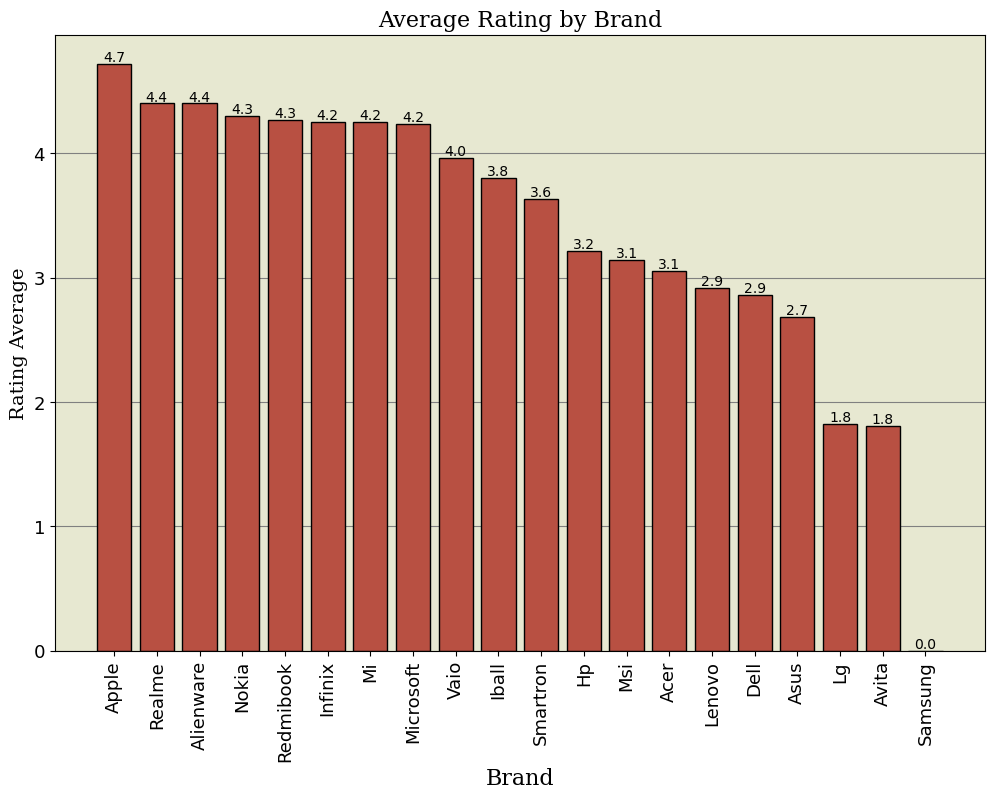

In [1233]:
#Get average rating per brand, sort data for plotting.
MASK_RATING = clean_df['star_rating'] > 0.0
average_ratings = clean_df.groupby('brand')['star_rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='star_rating', ascending=False)

font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}


# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=average_ratings['brand'], height=average_ratings['star_rating'], color='#B85042', edgecolor='black', zorder=2)

#Set title, axis names, customize fonts.
ax.set_xlabel("Brand", fontdict=font1)
ax.set_ylabel("Rating Average", fontdict=font2)
ax.set_title("Average Rating by Brand", fontdict=font1)

#Customize graph
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=90, ha='center', fontsize=13)
plt.yticks(fontsize=13)

#Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + .11, 
        f'{height:.1f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=10)


plt.show()

### **<u>2. Which brand is the most expensive?</u>**

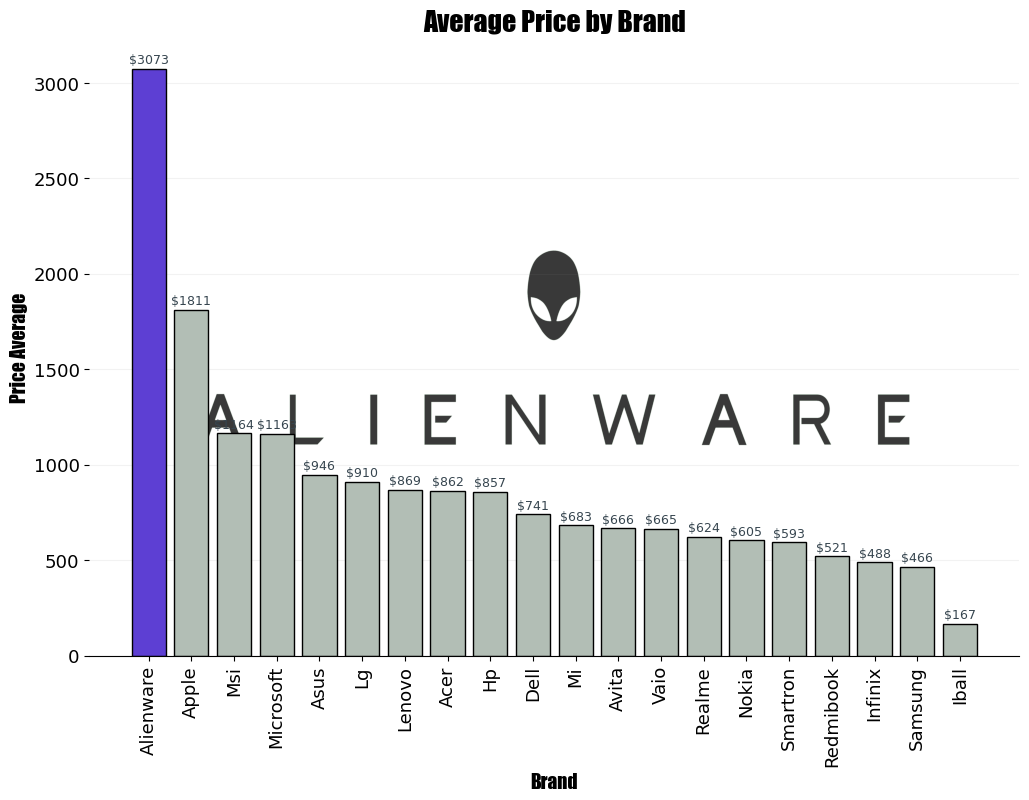

In [1157]:
#Sort data for plotting.
average_price = clean_df.groupby('brand')['latest_price_usd'].mean().reset_index()
average_price = average_price.sort_values(by='latest_price_usd', ascending=False)

#Color mapping and font dictionaries for styling
color_mapping = ['#B2BEB5' for bar in range(20)]
color_mapping[0] = ('#5D3FD3')
font3 = {'family':'fantasy','color':'black','size':20}
font4= {'family':'fantasy','color':'black','size':14}

# Plot the bar chart.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=average_price['brand'], height=average_price['latest_price_usd'], color=color_mapping, edgecolor='black', zorder=2)

#Set title, axis names, customize fonts.
ax.set_xlabel("Brand", fontdict=font4)
ax.set_ylabel("Price Average", fontdict=font4)
ax.set_title("Average Price by Brand", fontdict=font3)
plt.xticks(rotation=90, ha='center', fontsize=13)
plt.yticks(fontsize=13)

# Get the current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
ax.grid(axis = 'y', color='grey', alpha=0.1)
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_2\Phase 2 Project\images\Alienware-logo.png')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.9)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Bar annotations
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 80, 
        f'${height:.0f}', 
        ha='center', 
        va='top', 
        color='#36454F', 
        fontsize=9)

plt.show()

### **<u>3. Are AMD or Intel processor laptops more expensive? Extra: How do their ratings compare?</u>**

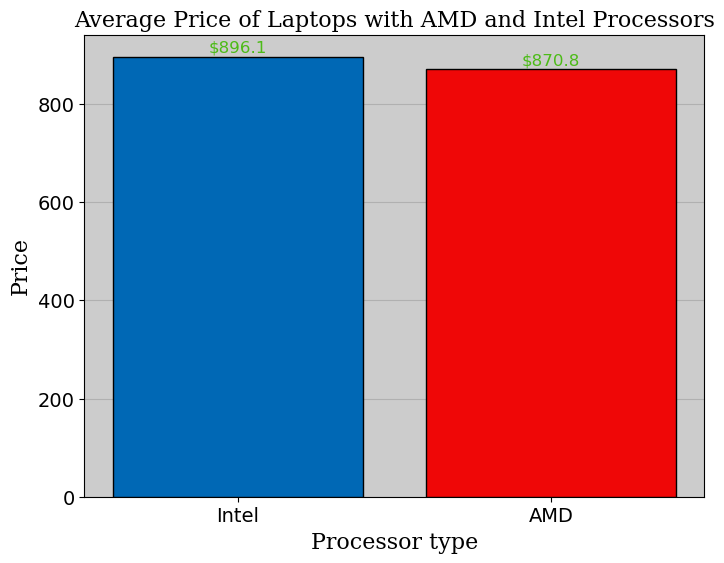

In [1158]:
#Sort data for graphing
AMD_INTEL_MASK = (clean_df['processor_brand'] == "Intel") | (clean_df['processor_brand'] == "AMD")
amd_intel_df = clean_df[AMD_INTEL_MASK]
mean_amd_intel_df = amd_intel_df.groupby("processor_brand")['latest_price_usd'].mean().reset_index()

#Color map for both bars and color dictionary for fonts of axis.
color_mapping = ['#ef0707' for bar in range(2)]
color_mapping[1] = ('#0068B5')
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set up graph, label the axis + title
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data=mean_amd_intel_df, x=mean_amd_intel_df['processor_brand'], height=mean_amd_intel_df['latest_price_usd'], color=color_mapping, zorder=3, edgecolor="black", linewidth=1)
ax.set_xlabel("Processor type", fontdict=font1)
ax.set_ylabel("Price", fontdict=font1)
ax.set_title("Average Price of Laptops with AMD and Intel Processors", fontdict=font1)

#Further customize the graph by adjusting font size of ticks.
ax.grid(axis='y')
ax.invert_xaxis()
plt.xticks(ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('#CCCCCC')

#Annotate the bars to add the average amount in USD.
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 34, 
        f'${height:.1f}', 
        ha='center', 
        va='top', 
        color='#4CBB17', 
        fontsize=12)

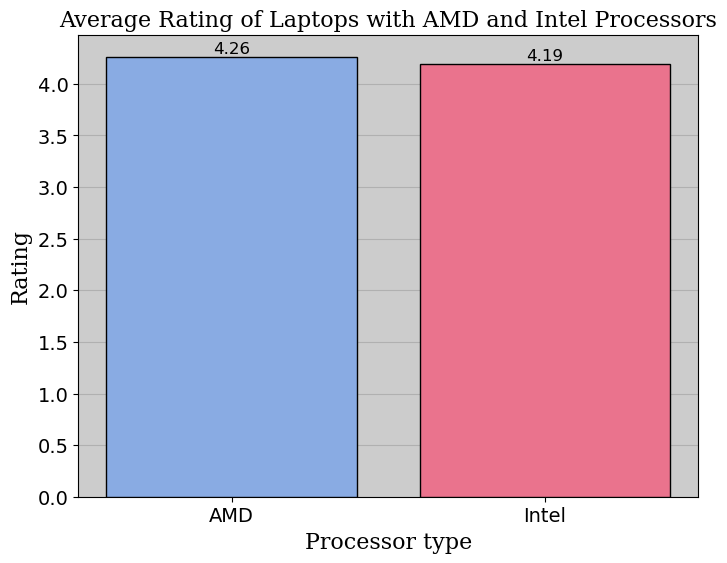

In [1207]:
#Sort data for graphing
amd_intel_no_zero = amd_intel_df[amd_intel_df['star_rating'] > 0.0]
mean_amd_intel_rating_df = amd_intel_no_zero.groupby("processor_brand")['star_rating'].mean().reset_index()

#Color map for both bars and color dictionary for fonts of axis.
color_mapping = ['#89ABE3' for bar in range(2)]
color_mapping[1] = ('#EA738D')
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set up graph, label the axis + title
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data=mean_amd_intel_rating_df, x=mean_amd_intel_rating_df['processor_brand'], height=mean_amd_intel_rating_df['star_rating'], color=color_mapping, zorder=3, edgecolor="black", linewidth=1)
ax.set_xlabel("Processor type", fontdict=font1)
ax.set_ylabel("Rating", fontdict=font1)
ax.set_title("Average Rating of Laptops with AMD and Intel Processors", fontdict=font1)

#Further customize the graph by adjusting font size of ticks.
ax.grid(axis='y')
plt.xticks(ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('#CCCCCC')

#Annotate the bars to add the average amount in USD.
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 0.15, 
        f'{height:.2f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=12)

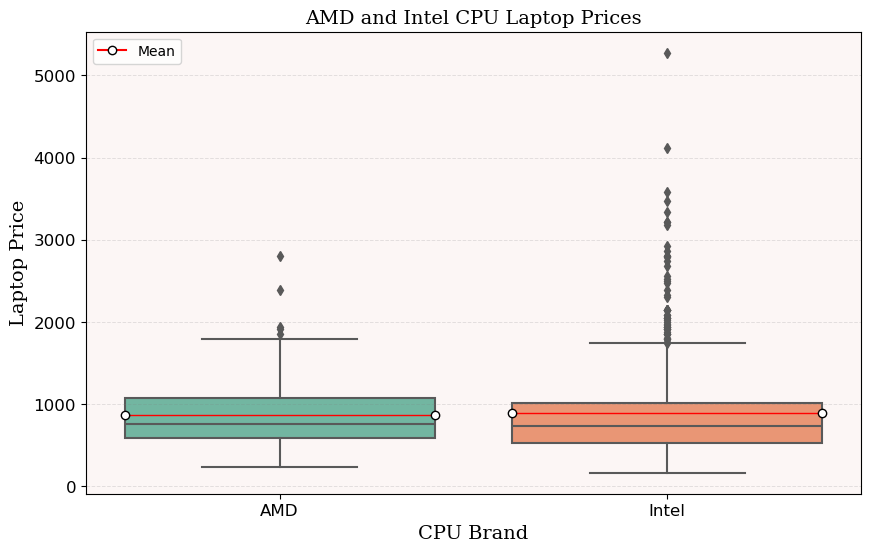

In [1213]:
#set up Box plot visualization and plot it
plt.figure(figsize=(10, 6))
sns.boxplot(x='processor_brand', 
            y='latest_price_usd', 
            data=amd_intel_df, 
            palette="Set2",
            zorder=2,
            showmeans=True, 
            meanline=True, 
            meanprops={"marker":"o", "linestyle":"-", "color":"#ff0000",  "markerfacecolor":"white", "markeredgecolor":"black"}
            )

#Set axis names and title, customize fonts
plt.title('AMD and Intel CPU Laptop Prices', fontdict=font2)
plt.xlabel('CPU Brand', fontdict=font2)
plt.ylabel('Laptop Price',fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Set background of grid to custom color and add y-axis gridlines.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.2, zorder=1)

# Add custom legend for the mean line and add it to the plot
mean_line = Line2D([0], [0], color='#ff0000', marker='o', markerfacecolor='white', markeredgecolor='black', linestyle='-', label='Mean')
plt.legend(handles=[mean_line], loc='upper left')

plt.show()

### **<u>4.	Which operating systems are rated the highest?</u>**

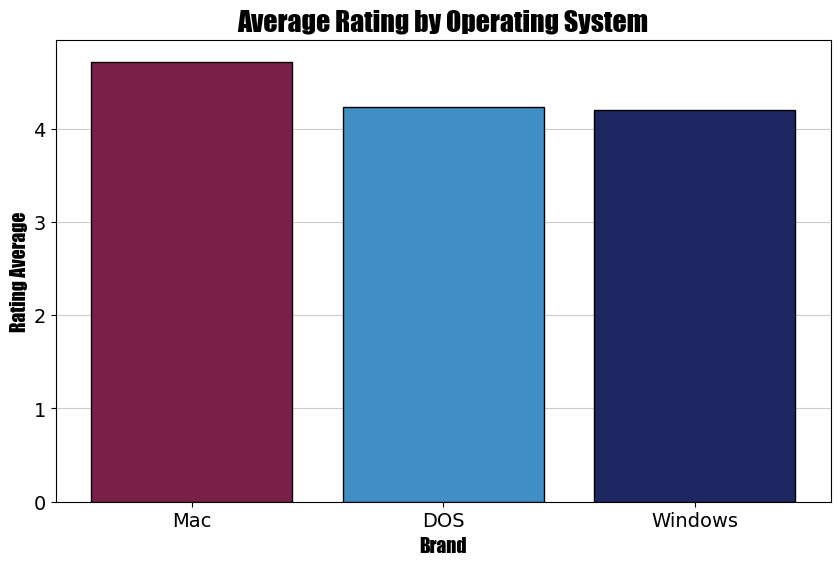

In [1203]:
#Sort data for plotting
MASK_RATING = clean_df['star_rating'] > 0.0
os_ratings = clean_df[MASK_RATING].groupby("operating_system")['star_rating'].mean().reset_index()
os_ratings = os_ratings.sort_values(by='star_rating', ascending=False)

#color map
color_mapping = ['#1E2761' for bar in range(3)]
color_mapping[0] = ('#7A2048')
color_mapping[1] = ('#408EC6')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=os_ratings['operating_system'], height=os_ratings['star_rating'],color=color_mapping, edgecolor="black", zorder=3)

#Set axis and title
ax.set_xlabel("Brand", fontdict=font4)
ax.set_ylabel("Rating Average", fontdict=font4)
ax.set_title("Average Rating by Operating System", fontdict=font3)
plt.xticks(ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis = 'y', color='grey', alpha=0.4)

plt.show()


### **<u>5. Of the top thirty models, which models are the most expensive?</u>**

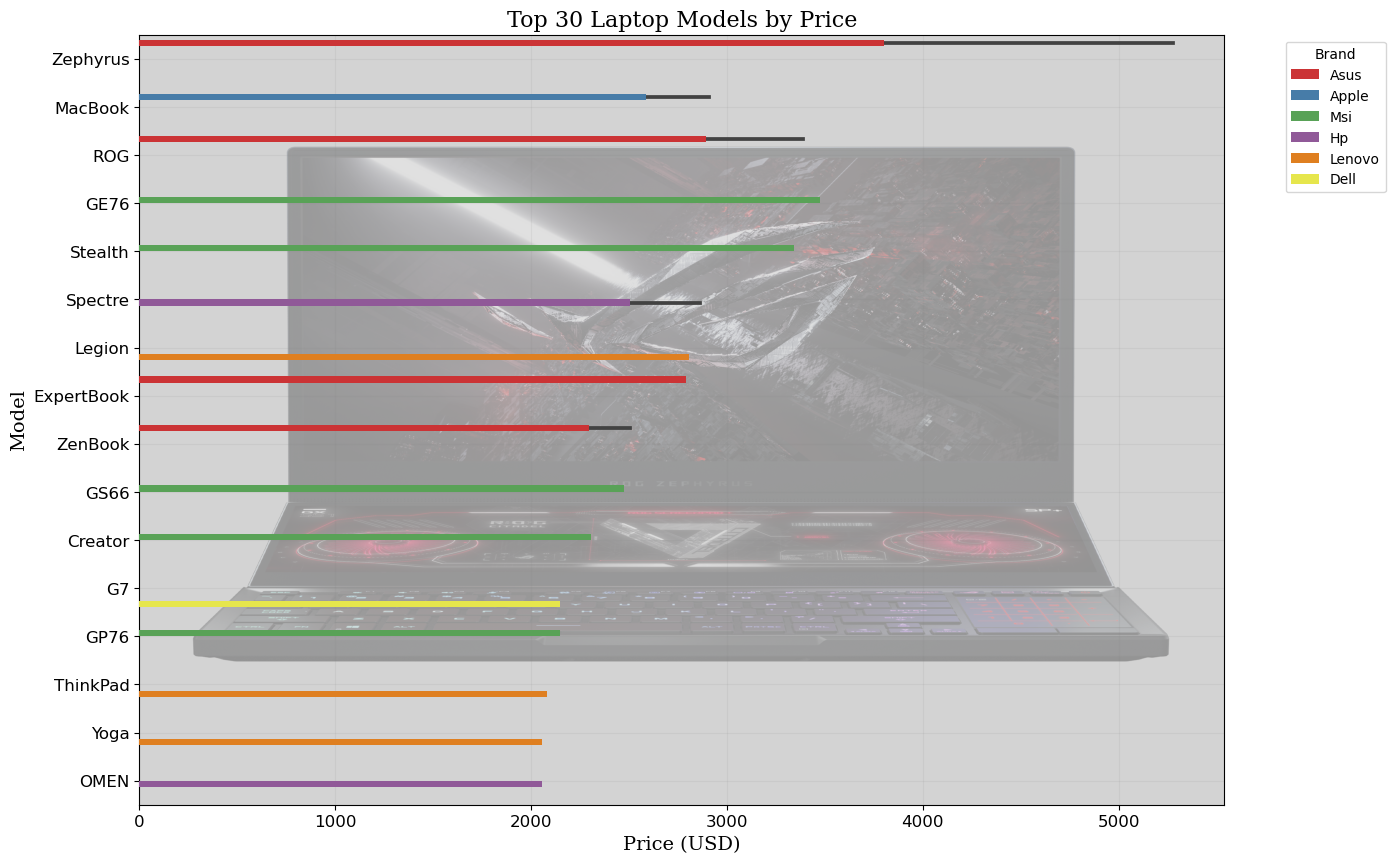

In [1214]:
#Sort Data for plotting.
MASK_MODEL = clean_df['model'] != "Unknown Model"
columns_models = ['brand','model','latest_price_usd']
model_brand_price = clean_df[MASK_MODEL][columns_models].sort_values(by="latest_price_usd", ascending=False).head(30)

#Set up the plot and plot the bar plot.
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_facecolor('#D3D3D3')
ax = sns.barplot(x='latest_price_usd', y='model', hue='brand', data=model_brand_price, dodge=True, palette='Set1', zorder=3)

#Set axis names, title, axis tick sizes.
plt.title('Top 30 Laptop Models by Price', fontdict=font1)
plt.xlabel('Price (USD)', fontdict=font2)
plt.ylabel('Model', fontdict=font2)
plt.xticks(ha='center', fontsize=12)
plt.yticks(fontsize=12)

# Get the current axis limits.
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
ax.grid(axis = 'both', color='grey', alpha=0.1)
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_2\Phase 2 Project\images\asusZephyrus.png')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.3)

#Graph customizations
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### **<u>6. What are the average ratings for laptops by their GPU's GB Amount?</u>**


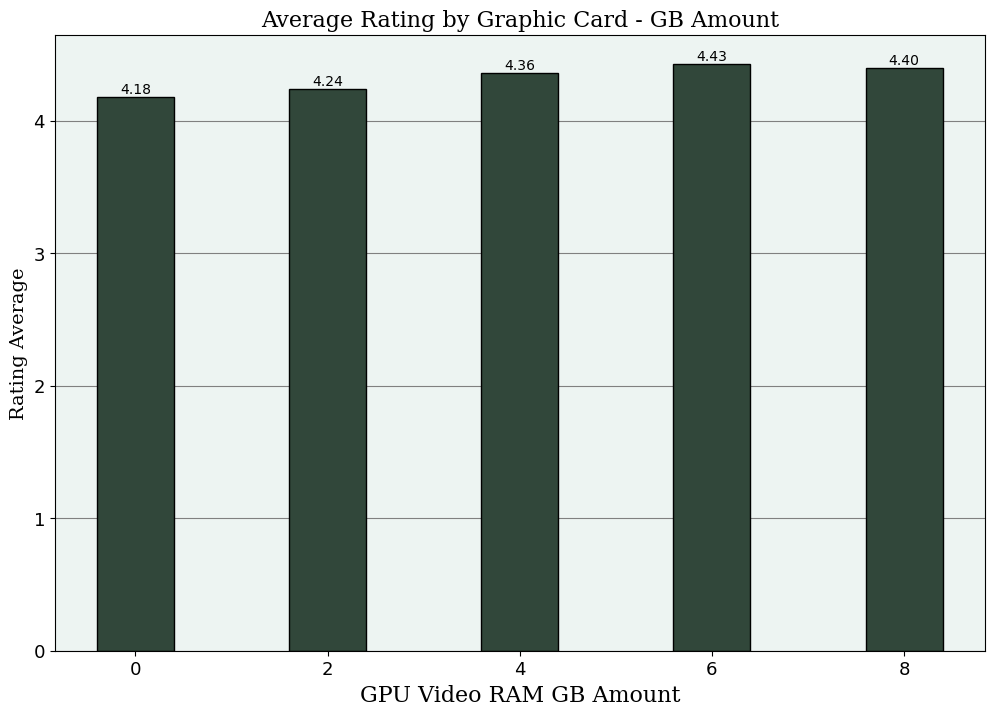

In [1228]:
#Get average rating per GPU sort data for plotting.
MASK_RATING = clean_df['star_rating'] > 0.0
average_gpu = clean_df[MASK_RATING].groupby('graphic_card_gb')['star_rating'].mean().reset_index()
average_gpu = average_gpu.sort_values(by='star_rating', ascending=False)

font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}


# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=average_gpu['graphic_card_gb'], height=average_gpu['star_rating'], color='#31473A', edgecolor='black', zorder=2)

#Set title, axis names, customize fonts.
ax.set_xlabel("GPU Video RAM GB Amount", fontdict=font1)
ax.set_ylabel("Rating Average", fontdict=font2)
ax.set_title("Average Rating by Graphic Card - GB Amount", fontdict=font1)

#Customize graph
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('#EDF4F2')
plt.xticks(ha='center', fontsize=13)
plt.yticks(fontsize=13)

#Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + .11, 
        f'{height:.2f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=10)


plt.show()

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 3: Inferential Questions Analysis
</div>

In [1162]:
#Define function for testing our hypothesis.

def test_outcome(pvalue, alpha=0.05):
    if pvalue < alpha:
        return "Reject the null hypothesis."
    else:
        return "Fail to reject the null hypothesis."

#Creating sample for analysis.
df_sample_a = clean_df.sample(n=200, random_state=1)

#Slicing the sample to include only ratings that have merit (0.0 were null.)
good_rating_sample = df_sample_a[df_sample_a['star_rating'] > 0.0]
good_rating_df = clean_df[clean_df['star_rating'] > 0.0]

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    3.1 Let's check visually and run a Shapiro-Wilkes test to see if our data distribution is normal. 
</div>

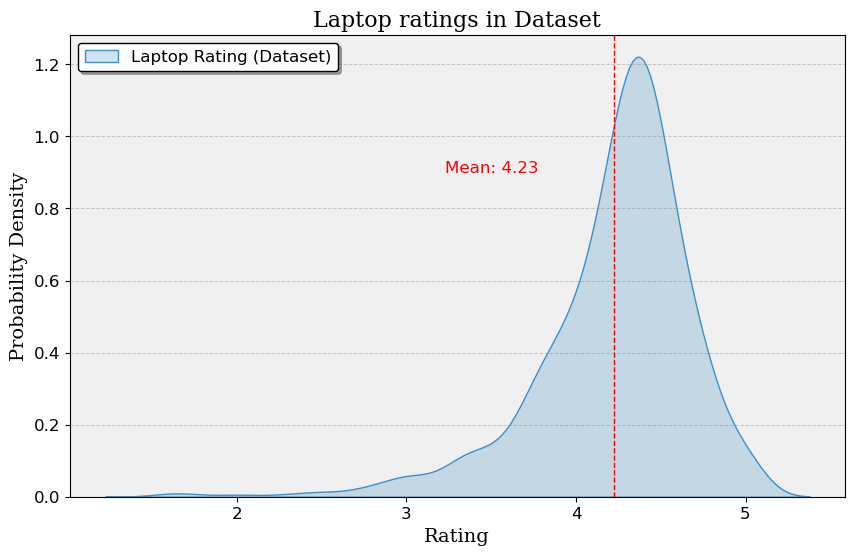

In [1163]:
#Inspected the Dataset to see how the rating data is distributed for ratings (data does not include 0 ratings).

#Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=good_rating_df, x="star_rating", color='#408EC6', label="Laptop Rating (Dataset)", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Laptop ratings in Dataset", fontdict=font1)
plt.xlabel('Rating', fontdict=font2)
plt.ylabel('Probability Density', fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)
ax.set_facecolor('#f0f0f0')

# Add a vertical line at the mean
mean_points = good_rating_df['star_rating'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points - 1, 0.9, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

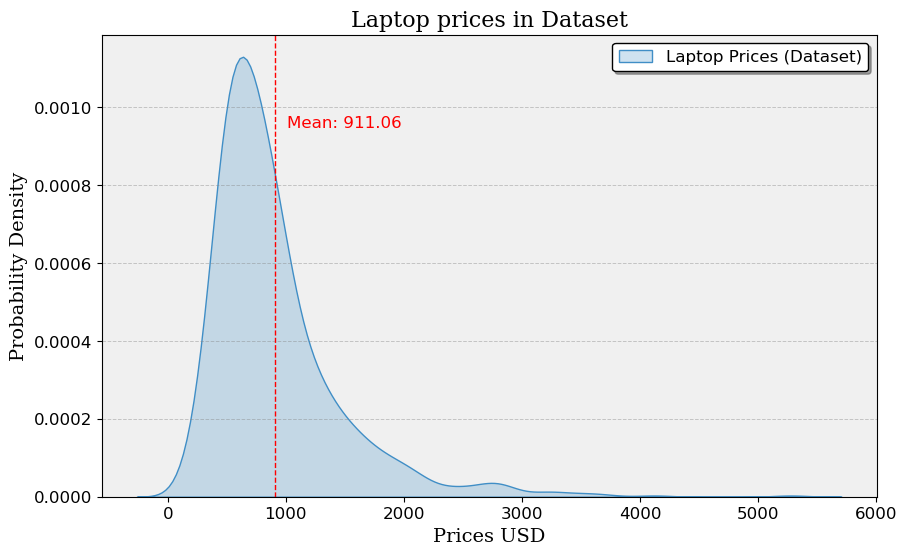

In [1164]:
#Inspected the Dataset to see how the laptop price data is distributed for price.

#Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=clean_df, x="latest_price_usd", color='#408EC6', label="Laptop Prices (Dataset)", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Laptop prices in Dataset", fontdict=font1)
plt.xlabel('Prices USD', fontdict=font2)
plt.ylabel('Probability Density', fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)
ax.set_facecolor('#f0f0f0')

# Add a vertical line at the mean
mean_points = clean_df['latest_price_usd'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points + 100, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

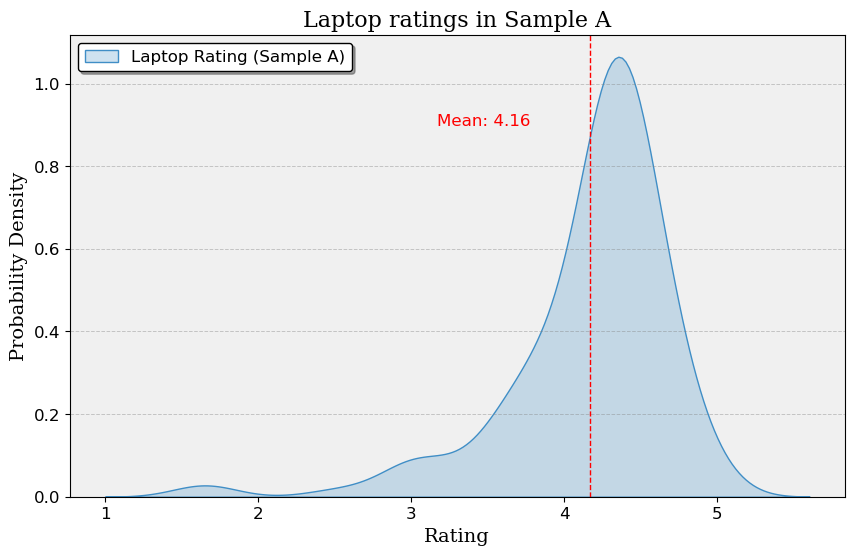

In [1186]:
#Inspecting the sample to see how the rating data is distributed for ratings, does not include 0.0 ratings. - Matches up very close to the dataset.

#Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=good_rating_sample, x="star_rating", color='#408EC6', label="Laptop Rating (Sample A)", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Laptop ratings in Sample A", fontdict=font1)
plt.xlabel('Rating', fontdict=font2)
plt.ylabel('Probability Density', fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)
ax.set_facecolor('#f0f0f0')

# Add a vertical line at the mean
mean_points = good_rating_sample['star_rating'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points - 1, 0.9, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

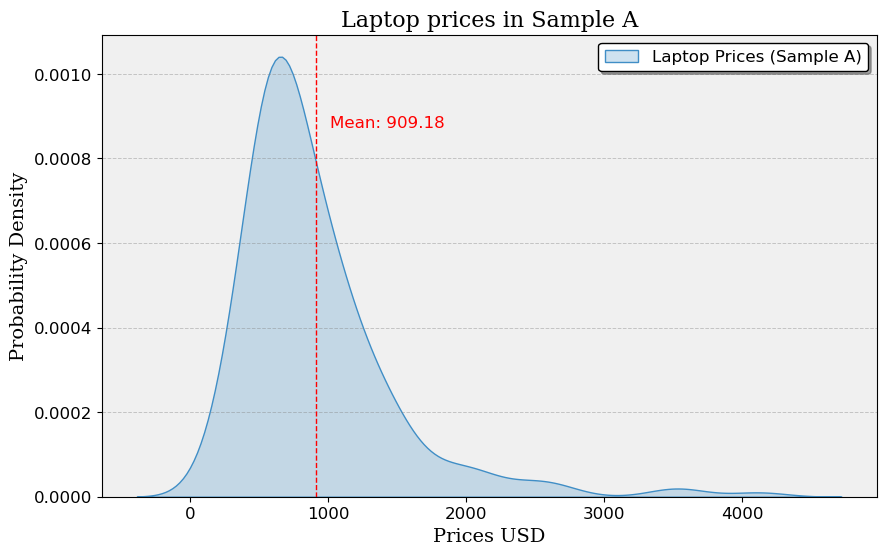

In [1166]:
#Inspected the sample to see how the laptop price data is distributed for price. - Matches up very close to the dataset.

#Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=df_sample_a, x="latest_price_usd", color='#408EC6', label="Laptop Prices (Sample A)", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Laptop prices in Sample A", fontdict=font1)
plt.xlabel('Prices USD', fontdict=font2)
plt.ylabel('Probability Density', fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)
ax.set_facecolor('#f0f0f0')

# Add a vertical line at the mean
mean_points = df_sample_a['latest_price_usd'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points + 100, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [1167]:
#Performing normality test for ratings.

stat, p_val = stats.shapiro(good_rating_sample['star_rating'])
p_val

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [1168]:
#Performing normality test for price.

stat, p_val = stats.shapiro(df_sample_a['latest_price_usd'])
p_val

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### **<u>Interpretation</u>**

After examining the distribution of latest prices and ratings, we have a Non-Parametric distribution for our dataset (Non-Gaussian or non-normal), and therefore we will need to perform Nonparametric statistical significance tests such as Mann-Whitney U Test (Non Parametric version of Students T-Test) and Kruskal-Wallis H Test (Non Parametric version of ANOVA Test) 

### **<u>1. Is there a significant difference in the prices between laptops with different processor brands (e.g., Intel vs. AMD)? (Mann-Whitney U Test)</u>**

$H_0$: _There is no difference in price between laptops with different processor brands such as AMD vs. Intel._

$H_1$: _There is a difference in price between laptops with different processor brands such as AMD vs. Intel._

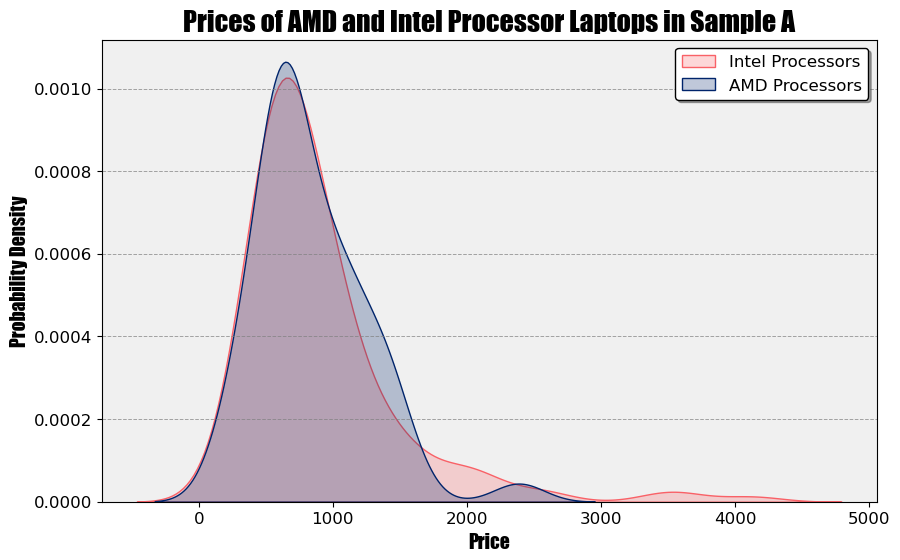

In [1169]:
sample_processor_intel = df_sample_a[df_sample_a['processor_brand'] == "Intel"]['latest_price_usd']
sample_processor_amd = df_sample_a[df_sample_a['processor_brand'] == "AMD"]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=sample_processor_intel, x=sample_processor_intel, color='#F96167', label="Intel Processors", fill=True)
sns.kdeplot(data=sample_processor_amd, x=sample_processor_amd, color='#00246B', label="AMD Processors", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Prices of AMD and Intel Processor Laptops in Sample A", fontdict=font3)
plt.xlabel('Price', fontdict=font4)
plt.ylabel('Probability Density', fontdict=font4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [1212]:
#Interpret Results
stat, p_val = mannwhitneyu(sample_processor_intel, sample_processor_amd)
print(p_val)

alpha = 0.05

test_outcome(p_val, alpha=alpha)

0.9964533022037422


'Fail to reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is no significant difference between the means of price in each sample of laptops that have Intel processors and laptops that have AMD processors.


### **<u>2. Do laptops with solid-state drives (SSD's) have significantly different prices compared to those with hard disk drives (HDD's)? (Mann-Whitney U Test)</u>**

$H_0$: _There is no difference in price between laptops with SSD's compared to Laptops with HDD's._

$H_1$: _There is a difference in price between laptops with SSD's compared to Laptops with HDD's._

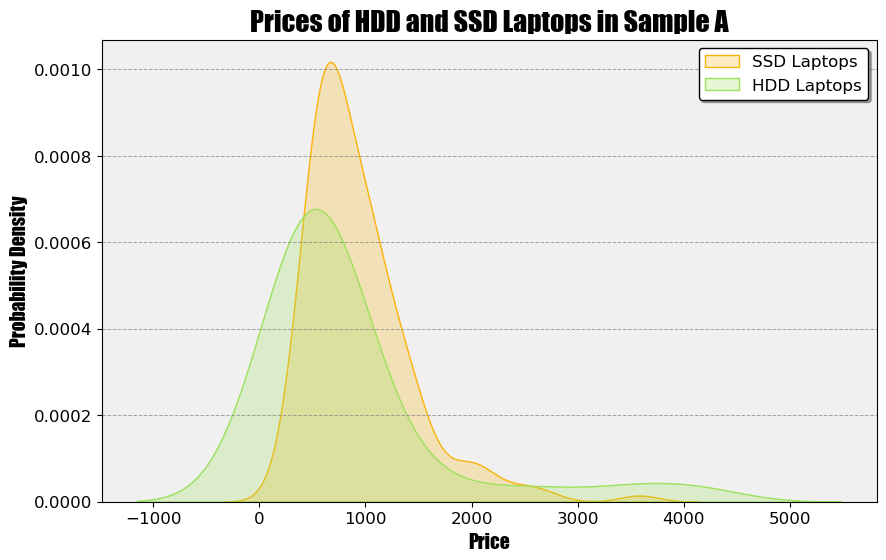

In [1171]:
sample_ssd = df_sample_a[(df_sample_a['solid_state_drive'] != "0 GB") & (df_sample_a['hard_disk_drive'] == "0 GB")]['latest_price_usd']
sample_hdd = df_sample_a[(df_sample_a['solid_state_drive'] == "0 GB") & (df_sample_a['hard_disk_drive'] != "0 GB")]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=sample_ssd, x=sample_ssd, color='#fbb30b', label="SSD Laptops", fill=True)
sns.kdeplot(data=sample_hdd, x=sample_hdd, color='#9ce15b', label="HDD Laptops", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Prices of HDD and SSD Laptops in Sample A", fontdict=font3)
plt.xlabel('Price', fontdict=font4)
plt.ylabel('Probability Density', fontdict=font4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax = plt.gca()
ax.set_facecolor('#f0f0f0')


# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

#The KDE plot is assuming some negative values, despite there being no negative values.

In [1172]:
stat, p_val = mannwhitneyu(sample_ssd, sample_hdd)
print(p_val)

alpha = 0.05

test_outcome(p_val, alpha=alpha)

0.0016371099590585666


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is a statistically significant difference between the means of both samples of laptops that have SSD's and laptops that have hard disk drives and as a result, further research is warranted.


### **<u>3. Is there a significant difference in the prices of laptops based on their operating system? (Kruskal-Wallis H Test)</u>**

- $H_0$ : $\mu_{Windows} = \mu_{Mac} = \mu_{DOS}$

- $H_a$ : $H_0$ is not true

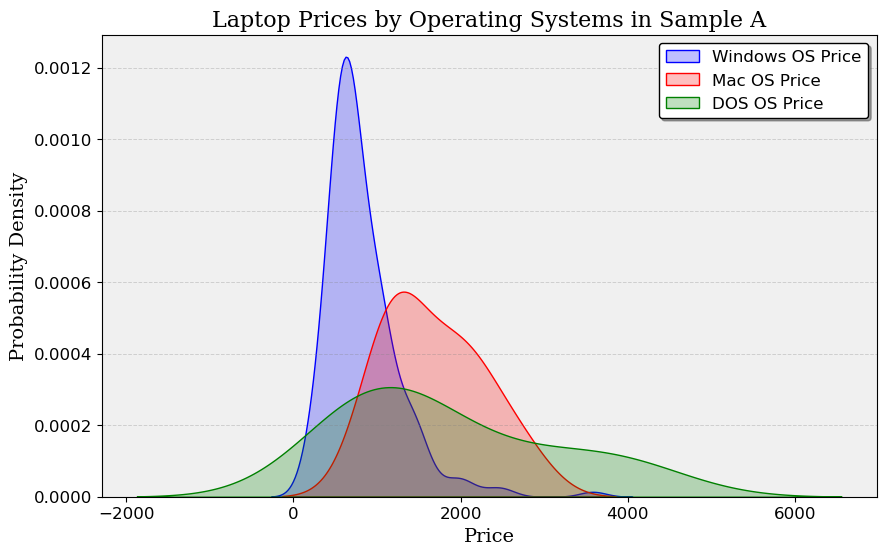

In [1173]:
#Data sorting for plotting.
windows_sample = df_sample_a[df_sample_a['operating_system'] == "Windows"]['latest_price_usd']
mac_sample = df_sample_a[df_sample_a['operating_system'] == "Mac"]['latest_price_usd']
dos_sample = df_sample_a[df_sample_a['operating_system'] == "DOS"]['latest_price_usd']

#Set up the plot.
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=windows_sample, x=windows_sample, color='blue', label="Windows OS Price", fill=True)
sns.kdeplot(data=mac_sample, x=mac_sample, color='red', label="Mac OS Price", fill=True)
sns.kdeplot(data=dos_sample, x=dos_sample, color='green', label="DOS OS Price", fill=True)

#Labeling axes, customizing font sizes and styles, adjust tick sizes, and setting face color to the ax.
plt.title("Laptop Prices by Operating Systems in Sample A", fontdict=font1)
plt.xlabel('Price', fontdict=font2)
plt.ylabel('Probability Density', fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Grid customization
ax = plt.gca()
ax.set_facecolor('#f0f0f0')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')


plt.show()

In [1174]:
stat, p_value = kruskal(windows_sample, mac_sample, dos_sample)
p_value

test_outcome(p_value, alpha=alpha)

'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that our Null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    3.2 Inferential Analysis via Central Limit Theorem (CLT)
</div>


### **<u>4. Is there a significant difference in the ratings between different brands, such as Asus and HP? (Independent Student T-Test)</u>**

$H_0$: _There is no difference between the ratings in different brand such as Asus and HP._

$H_1$: _There is a difference between the ratings in different brand such as Asus and HP._

In [1175]:
#Create a function to easily create a sample of means to apply CLT.

def generate_sample_means(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

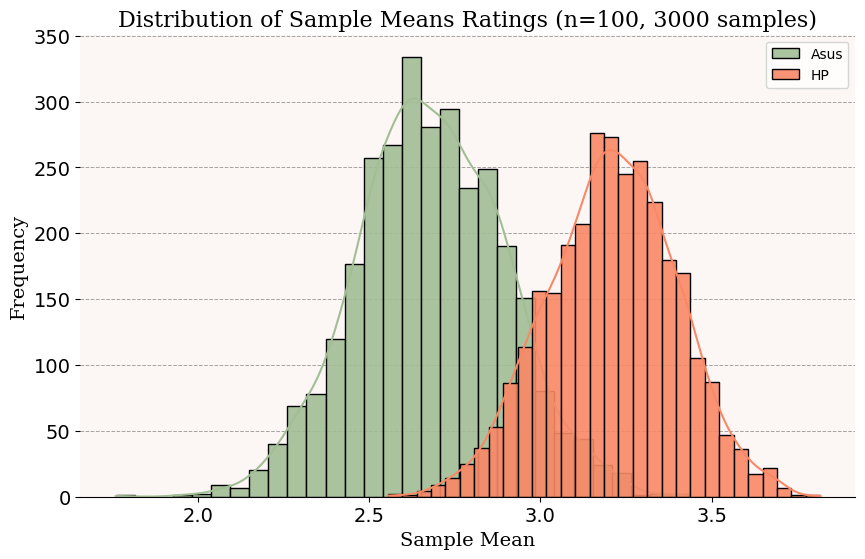

In [1182]:
#Slice main DF by each computer brand.
asus_df = clean_df[clean_df['brand'] == "Asus"]
hp_df = clean_df[clean_df['brand'] == "Hp"]

#Only include star ratings in stored variables.
asus_data = asus_df['star_rating'].values
hp_data = hp_df['star_rating'].values

# Parameters for sampling
sample_size = 100  
num_samples = 3000  

# Generate sample means
asus_sample_means = generate_sample_means(asus_data, sample_size, num_samples)
hp_sample_means = generate_sample_means(hp_data, sample_size, num_samples)

# Plot the distribution of sample means
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(asus_sample_means, kde=True, color='#A1BE95', bins=30, label="Asus", alpha=0.9, zorder=2)
sns.histplot(hp_sample_means, kde=True, color='#F98866', bins=30, label="HP", alpha=0.9, zorder=2)

#Set title and axis, additional plot customization
plt.title(f'Distribution of Sample Means Ratings (n={sample_size}, {num_samples} samples)', fontdict=font1)
plt.xlabel('Sample Mean', fontdict=font2)
plt.ylabel('Frequency', fontdict=font2)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7, zorder=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

#Remove lines of grid perimeter to make more appealing.
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Set background of grid to custom color.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')

plt.show()

In [1183]:
# Shapiro-Wilk test for normality for asus sample means.
_, p_value = stats.shapiro(asus_sample_means)
print(p_value)

if p_value > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")

_, p_value = stats.shapiro(hp_sample_means)
print(p_value)

if p_value > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")


0.5490847229957581
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).
0.06662770360708237
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).


In [1184]:
# Perform a two-sample t-test on the sample means
stat, p_value = ttest_ind(asus_sample_means, hp_sample_means, equal_var=False)
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the ratings of laptops based on their brand between HP and Asus.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the ratings of laptops based on their operating system.")


0.0
Reject the null hypothesis: There is a significant difference in the ratings of laptops based on their brand between HP and Asus.


### **<u>Interpretation</u>**

After performing our test, we have rejected the null hypothesis. There was found to be a significant difference in the means between the ratings of laptops based on their brand between HP and Asus and therefore warrants additional research.

### **<u>5. Do laptops with higher RAM tend to have higher prices compared to those that do not? (ANOVA Test)</u>**

- $H_0$ : $\mu_{4 GB} = \mu_{8 GB} = \mu_{16 GB}$

- $H_a$ : $H_0$ is not true

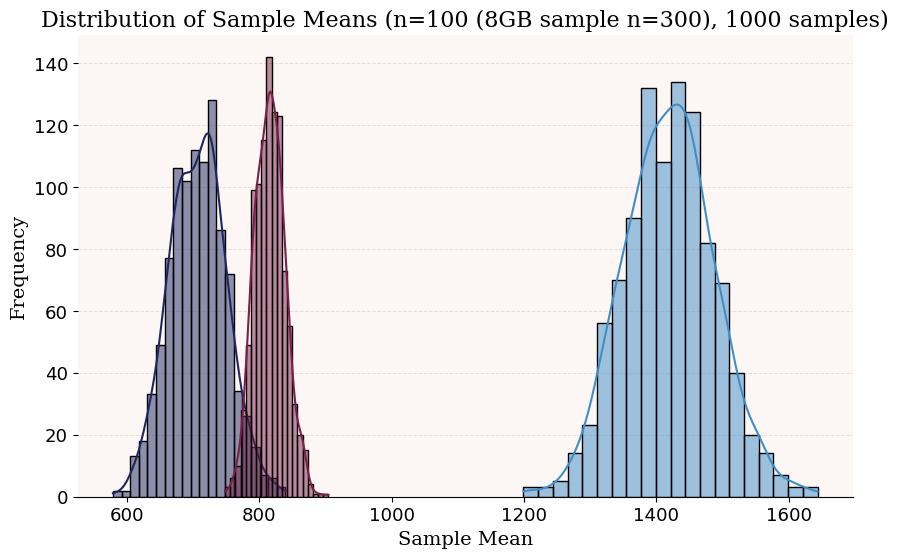

In [1179]:
#Slice main DF by each RAM amount type and only include the USD value.
gb4_data = clean_df[clean_df['ram_gb'] == "4 GB"]['latest_price_usd'].values
gb8_data = clean_df[clean_df['ram_gb'] == "8 GB"]['latest_price_usd'].values
gb16_data = clean_df[clean_df['ram_gb'] == "16 GB"]['latest_price_usd'].values

# Parameters for sampling
sample_size = 100  
num_samples = 1000 

# Generate sample means
gb4_sample_means = generate_sample_means(gb4_data, sample_size, num_samples)
gb8_sample_means = generate_sample_means(gb8_data, sample_size + 200, num_samples)
gb16_sample_means = generate_sample_means(gb16_data, sample_size, num_samples)

# Plot the distribution of sample means
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(gb4_sample_means, kde=True, color='#1E2761', bins=20, zorder=2)
sns.histplot(gb8_sample_means, kde=True, color='#7A2048', alpha=0.5, bins=20, zorder=2)
sns.histplot(gb16_sample_means, kde=True, color='#408EC6', bins=20, zorder=2)

#Customize the plot and label axis.
plt.title(f'Distribution of Sample Means (n={sample_size} (8GB sample n=300), {num_samples} samples)',fontdict=font1)
plt.xlabel('Sample Mean', fontdict=font2)
plt.ylabel('Frequency', fontdict=font2)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.2, zorder=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#Remove lines of grid perimeter to make more appealing.
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Set background of grid to custom color.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')

plt.show()

In [1180]:
# Shapiro-Wilk test for normality

#Test for 4 GB samples
_, p_value_one = stats.shapiro(gb4_sample_means)
print(p_value_one)

if p_value_one > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).\n")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).\n")

#Test for 8GB samples
_, p_value_two = stats.shapiro(gb8_sample_means)
print(p_value_two)

if p_value_two > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).\n")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).\n")

#Test for 16GB samples
    _, p_value_three = stats.shapiro(gb16_sample_means)
print(p_value_three)

if p_value_three > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")



0.5475414395332336
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).

0.11612598598003387
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).

0.13026148080825806
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).


In [1181]:
# ANOVA Test to determine if samples are significantly different.
stat, p_value = f_oneway(gb4_sample_means, gb8_sample_means, gb16_sample_means)
print(p_value)

#Interpret results
test_outcome(p_value, alpha)

0.0


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that our Null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.


<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 4: Analysis and Conclusions
</div>

<div style="background-color: #FCF6F5; border: 2px solid #ccc; padding: 9px; width: 100%;">
    <h3 style="color: #990011; margin: 8px 0; text-decoration: underline; font-size: 1.3em;"><b>Analysis</b></h3>
    <p style="color: black;">Laptops are a convenient way to either get work done or game compared to desktop computers due to their portability. This dataset revealed some interesting insights for major technology companies such as Apple, LG, Alienware, Asus, Microsoft, MSI, Lenovo, Acer, HP, and Dell based on their prices and ratings received. The average prices of each brand revealed that Alienware is the most expensive brand on average, which makes sense considering Alienware manufactures high-end video gaming PCs, followed by Apple products which are fairly expensive compared to brands such as MSI, Asus, and Lenovo laptops. The average ratings per brand revealed that, on average, Apple laptops received the highest ratings of all brands, followed by LG, MSI, Nokia, Realme, and Alienware. This is interesting considering that nearly all of the top 10 brands with the highest ratings of their laptops were priced under $900, compared to the top 10 laptops by price and their respective ratings being slightly lower.</p>
    <p style="color: black;">Many factors can impact price and ratings, such as having more RAM, a better processor, a better GPU, and a larger display, which all can drive up the price. Additionally, one’s needs will differ, whether for gaming, programming, video editing, or simply surfing the web. According to the data, AMD processor laptops received better ratings and are also slightly cheaper on average when compared to Intel. Intel had many more outliers compared to AMD, with Intel CPU laptops being as expensive as roughly $5,500, and the most expensive AMD CPU laptop reaching nearly $3,000! That is a massive price for both, but an over $2,000 difference in price. Based on the ratings of operating systems, the Mac operating system is rated the highest, at roughly a 4.8 rating, whereas the popular competitor Microsoft Windows is rated at roughly 4.2. Additionally, the Asus Zephyrus laptop was priced to be one of the most expensive, with one model roughly $3,800 and another Zephyrus model exceeding $5,000. These must be high-end gaming laptops with high-end GPUs. The MacBook was also one of the top models of laptops that was most expensive in the dataset.</p>
    <p style="color: black;">In the Inferential Analysis portion, I asked specific questions about my data. My data was not normally distributed after plotting a KDE plot and testing for normality via a Shapiro-Wilk test. The first question I asked was, “Is there a significant difference in the prices between laptops with different processor brands, such as Intel and AMD?”. My null hypothesis was that there is no difference in price between laptops with different processor brands such as AMD vs. Intel and my alternative hypothesis was that there is a difference in price between laptops with different processor brands such as AMD vs. Intel. I used a Mann-Whitney U Test, which is similar to a Student's Independent T-Test for nonparametric data. After performing my test, we failed to reject the null hypothesis. This means that there was no significant difference between the means of price in each sample of laptops with Intel processors and laptops with AMD processors.</p>
    <p style="color: black;">My second question was, “Do laptops with solid-state drives (SSD's) have significantly different prices compared to those with hard disk drives (HDD's)?”. My null hypothesis was that there is no difference in price between laptops with SSDs compared to laptops with HDDs, and my alternative hypothesis was that there is a difference in price between laptops with SSDs compared to laptops with HDDs. I conducted a Mann-Whitney U test for this, and after running my test, we rejected the null hypothesis using an alpha value of 0.05. Based on our test outcome, it was found that there was a statistically significant difference between the means of both samples of laptops with SSDs and laptops with HDDs, and as a result, further research is warranted.</p>
    <p style="color: black;">For my third inferential question, I asked, “Is there a significant difference in the prices of laptops based on their operating system?”. For this test, I conducted a Kruskal-Wallis H Test, which is essentially an ANOVA test for non-parametric data. My null hypothesis was that the mean price of Windows operating system laptops is equal to the mean price of Mac operating system laptops, which is equal to the mean price of DOS operating system laptops. My alternative hypothesis is that the null hypothesis is not true. After running the test, we rejected the null hypothesis. This means that we found that our null hypothesis was not true and there was a statistically significant difference between the means of each group, which therefore warrants further research.</p>
    <p style="color: black;">For my fourth question, I applied the Central Limit Theorem (CLT) to normalize my data and asked two additional questions. First, I asked, “Is there a significant difference in the ratings between different brands, such as Asus and HP?”. My null hypothesis was that there is no difference between the ratings of different brands such as Asus and HP, and my alternative hypothesis was that there is a difference between the ratings of different brands such as Asus and HP. I conducted an Independent Student's T-Test for this question, and after running the test, we rejected the null hypothesis. There was found to be a significant difference in the means between the ratings of laptops based on their brand, specifically between HP and Asus, and therefore warrants additional research.</p>
    <p style="color: black;">Finally, the last inferential question I asked was, “Do laptops with higher RAM tend to have higher prices compared to those that do not?”. This involved three groups: 4GB RAM, 8GB RAM, and 16GB RAM. My null hypothesis was that the mean prices for 4GB RAM laptops are equal to the mean prices for 8GB RAM laptops, which are also equal to the mean prices for 16GB RAM laptops. My alternative hypothesis is that the null hypothesis is not true. For this, I conducted an ANOVA test. After running my test, we rejected the null hypothesis. We found that our null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.</p>
    <h3 style="color: #990011; margin: 8px 0; text-decoration: underline; font-size: 1.3em;"><b>Recommendation</b></h3>
    <p style="color: black;">Companies like Apple are doing a really good job, and I encourage Apple to continue doing what they are doing and investing in market research so that they can continue to understand the market and consumer needs. More well-known companies such as Dell, Acer, and HP laptops have an average rating above 4.0, which is great, but there is room for improvement, being on the lower end of 4’s when you compare them to Apple with an average rating of 4.7. Alienware is rated highly at 4.4, despite being on average $3,000 per laptop. Dell, Acer, and HP should consider making more laptops with AMD processors as they are cheaper than Intel processors on average and rated higher, which may indicate that consumers are happier with AMD and spending less money. These companies should also consider adding a GPU in their laptops, regardless of VRAM amount, as ratings on laptops with a GPU are higher than those without. I would not recommend Apple to use Windows operating systems as they are rated lower compared to the Mac operating system. However, companies like Dell, Acer, and HP can continue to use Windows, or potentially partner with Apple to explore their operating system and work together to build a new OS. Laptops with SSDs are more expensive on average compared to laptops with HDDs, but SSDs are much faster, which can improve customer satisfaction. I recommend making more laptops with SSDs.</p>
</div>
